In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
#giving the path of directory which contains the dataset
dataset_dir = 'D:PROJECT - 1/train'
val_data_dir = 'D:PROJECT - 1/test'

In [3]:
img_size=(48,48) #pixel size
batch_size=32    #batch which will be trained in one go

In [4]:
# created datagenerator for preprocessing
datagen = ImageDataGenerator(
        rescale = 1.0/255,   # to reduce the size of pixels 
        rotation_range = 20,
        width_shift_range = 0.2,
        height_shift_range = 0.2,
        horizontal_flip=True,
        fill_mode='nearest'
 )

validation_datagen = ImageDataGenerator(rescale=1.0/255)

#Load and Preprocess the data using flow_from_directory
data_generator = datagen.flow_from_directory(
        dataset_dir,
        color_mode='grayscale',
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
    val_data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',  # Use 'categorical' for multi-class classification
    color_mode='grayscale',    # Use 'grayscale' for grayscale images
    shuffle=True               
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


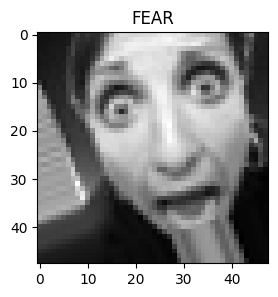

In [5]:
import matplotlib.pyplot as plt
class_label=['ANGRY','DISGUST','FEAR','HAPPY','NEUTRAL','SAD','SURPRISE']
img,label = data_generator.__next__()

import random
i=random.randint(0,(img.shape[0])-1)

image = img[i]
labl = class_label[label[i].argmax()]

plt.figure(figsize=(3,3))
plt.imshow(image[:,:,0],cmap='gray')
plt.title(labl)
plt.show()

In [6]:
# Create a sequential model
model = Sequential()

# Add the first convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))

# Add the second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.1))

# Add the third convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.1))

# Add the fourth convolutional layer
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.1))

# Flatten the feature maps
model.add(Flatten())

# Add a dense hidden layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

# Add the output layer
model.add(Dense(7, activation='softmax'))  # 7 classes for emotion classification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the Model
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 22, 22, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 128)       0         
 g2D)                                                   

In [7]:
import os

train_path = "D:PROJECT - 1/train"
test_path = "D:PROJECT - 1/test"

num_train_imgs = 0
for root,dirs,files in os.walk(train_path):
    num_train_imgs += len(files)
    
num_test_imgs = 0
for root,dirs,files in os.walk(test_path):
    num_test_imgs += len(files) 
 

print("Number of Training Images : ",num_train_imgs)
print("Number of Test Images : ",num_test_imgs)


Number of Training Images :  28709
Number of Test Images :  7178


In [8]:
'''epochs = 20

history = model.fit(
          data_generator,
          steps_per_epoch = num_train_imgs//batch_size,
          epochs = epochs,
          validation_data = validation_generator,
          validation_steps = num_test_imgs//batch_size)

model.save("emotion_detection_model.h5")
'''

'epochs = 20\n\nhistory = model.fit(\n          data_generator,\n          steps_per_epoch = num_train_imgs//batch_size,\n          epochs = epochs,\n          validation_data = validation_generator,\n          validation_steps = num_test_imgs//batch_size)\n\nmodel.save("emotion_detection_model.h5")\n'

In [9]:
from keras.models import load_model
import numpy as np
from sklearn import metrics

In [12]:
my_model = load_model("D:\PROJECT - 1\emotion_detection_model.h5",compile=False)

1/1 [==============================] - 5s 5s/step
Accuracy =  0.6875


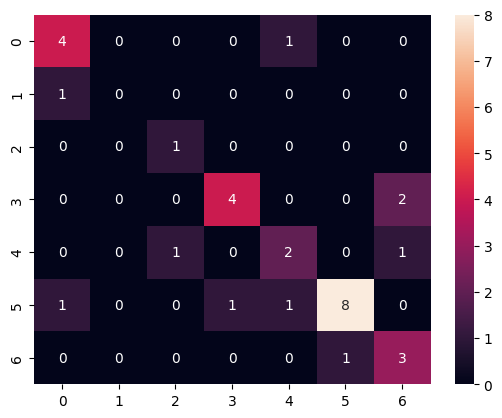

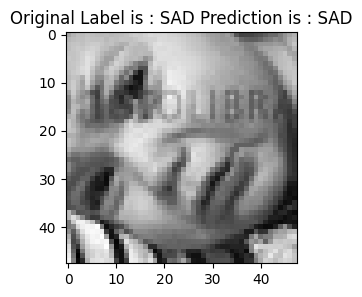

In [13]:
test_img, test_lbl = validation_generator.__next__()
predictions = my_model.predict(test_img)


predictions = np.argmax(predictions,axis=1)
test_labels = np.argmax(test_lbl,axis=1)

print("Accuracy = ",metrics.accuracy_score(test_labels,predictions))

from sklearn.metrics import confusion_matrix

import seaborn as sns

cm = confusion_matrix(test_labels,predictions)
sns.heatmap(cm,annot=True)

class_labels=['ANGRY','DISGUST','FEAR','HAPPY','NEUTRAL','SAD','SURPRISE']

import random
n=random.randint(0,(img.shape[0])-1)

image = test_img[n]
orig_labl = class_labels[test_labels[n]]
pred_labl  = class_labels[predictions[n]]
plt.figure(figsize=(3,3))
plt.imshow(image[:,:,0],cmap='gray')
plt.title("Original Label is : " + orig_labl + " Prediction is : " + pred_labl)
plt.show()

## For RealTime Detection

In [1]:
from keras.models import load_model
from time import sleep
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
import cv2
import numpy as np

In [2]:
face_classifier = cv2.CascadeClassifier('D:\PROJECT - 1/haarcascade_frontalface_default.xml')
emotion_model = load_model("D:\PROJECT - 1\emotion_detection_model.h5")
print("done")

done


In [3]:
class_labels=['ANGRY','DISGUST','FEAR','HAPPY','NEUTRAL','SAD','SURPRISE']
cap = cv2.VideoCapture(0)
print("done")

done


In [4]:
while True:
    ret,frame=cap.read()
    if not ret:
        print("Camera capture failed.")
        break
    labels=[]
    
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray,1.3,5)
    
    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h,x:x+w]
        roi_gray = cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)
        
        
        # Get Image Ready For Prediction
        roi = roi_gray.astype('float')/255.0
        roi = img_to_array(roi)
        roi = np.expand_dims(roi,axis=0)
        
        preds = emotion_model.predict(roi)[0]
        label = class_labels[preds.argmax()] #find the label
        label_position=(x,y)
        cv2.putText(frame,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)

        cv2.imshow('Emotion Detector : ',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
cap.release()    
cv2.destroyAllWindows()

1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 58ms/step


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 53ms/step


1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 56ms/step


KeyboardInterrupt: 